In [1]:
import os
import os.path as osp
root_dir = osp.dirname(osp.dirname(osp.dirname(os.getcwd())))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
plt.rcParams.update({'figure.autolayout': True})

model_names = {
    'baseline_e': 'OGT',
    # '1-seq': 'SEQ',
    '1-graph': 'DYN',
}

species2idx = {
    "Oleispira antarctica": 0,
    "Caenorhabditis elegans": 1,
    "Arabidopsis thaliana": 2,
    "Drosophila melanogaster": 3,
    "Danio rerio": 4,
    "Saccharomyces cerevisiae": 5,
    "Bacillus subtilis": 6,
    "Escherichia coli": 7,
    "Homo sapiens": 8,
    "Mus musculus": 9,
    "Geobacillus stearothermophilus": 10,
    "Picrophilus torridus": 11,
    "Thermus thermophilus": 12
}
cm = plt.get_cmap('gist_rainbow')

In [2]:
meta_file = osp.join(root_dir, 'data', 'collation', 'DeepSTABp', 'lysate.csv')

meta = np.loadtxt(meta_file, skiprows=1, delimiter=',', dtype=np.str_)
print(meta)

meta_accessions = meta[:,0]
meta_ogts = meta[:,2].astype(np.float_)
meta_species = meta[:,3]

# accession_groups = []
# for ogt in np.unique(ogts):
#     accession_groups.append(accessions[ogts == ogt])

[['A0A023PXQ4' '52.4077619837866' '32.0' 'Saccharomyces cerevisiae']
 ['A0A023T4K3' '37.96367254303041' '20.0' 'Caenorhabditis elegans']
 ['A0A023T778' '54.99367375656585' '37.0' 'Mus musculus']
 ...
 ['Z4YL87' '54.9920512273696' '37.0' 'Mus musculus']
 ['Z4YLI8' '48.64740428630003' '37.0' 'Mus musculus']
 ['Z4YML9' '53.356698003754886' '37.0' 'Mus musculus']]


In [3]:
save = True

0 DYN-predicted_values-train_set-best.csv


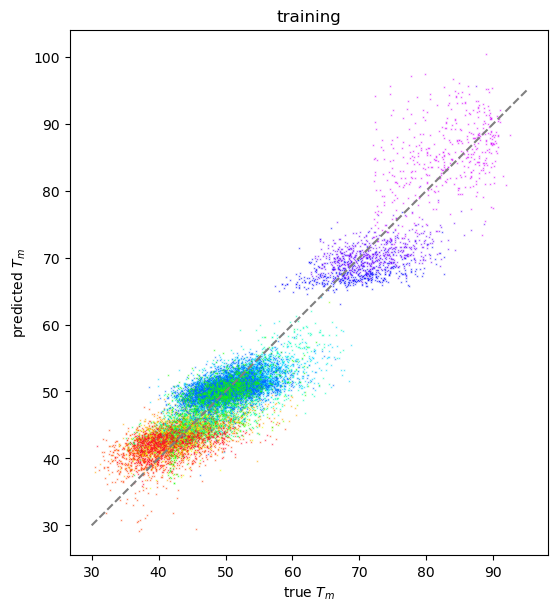

1 DYN-predicted_values-valid_set-best.csv


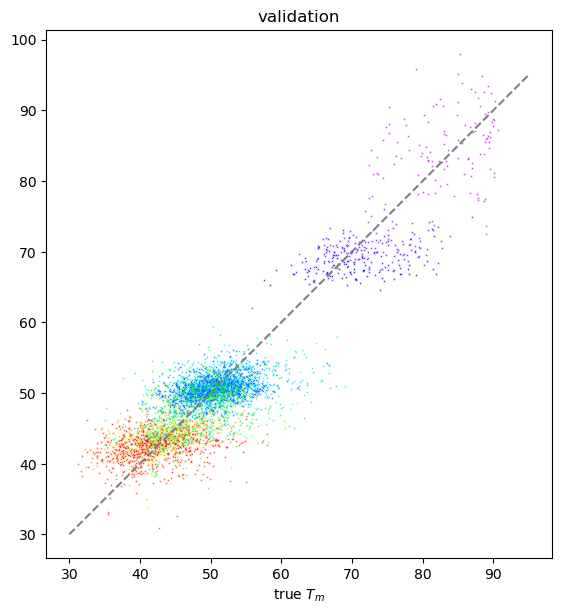

In [4]:
# color by species

model = '1-graph'

for i, set_name in enumerate(['training', 'validation']):

    alpha = 0.6 if set_name == 'training' else 0.8

    fig, ax = plt.subplots(
        1,1, sharex=True, sharey=True, figsize=(5.5,6), layout='constrained'
    )
    # ax = ax.flatten()
    # fig.suptitle()

    pred_file = f'{model_names[model]}-predicted_values-{set_name[:5]}_set-best.csv'
    print(i, pred_file)

    with open(pred_file, 'r') as f:
        header = f.readline().replace('# ', '').replace('\n', '')
        true = f.readline().replace('# true_labels,', '').replace('\n', '')

    species = []
    for accession in [a[:-5] for a in header.split(',')[1:]]:
        try:
            species.append(meta_species[meta_accessions==accession][0])
        except IndexError:
            print(accession)
            print(meta_accessions==accession)
    species = np.array(species)

    true = np.array(true.split(','), dtype=np.float_)
    pred = np.loadtxt(pred_file, dtype=np.float_, delimiter=',')[1:]

    for sp in np.unique(species):
        ax.scatter(
            true[species==sp], pred[species==sp], marker='x',
            s=0.1, alpha=alpha, zorder=3,
            # c=f'C{list(model_names).index(model)}'
            color=cm(species2idx[sp]/len(species2idx)),
        )

    # if i%2 != 0:
    #     sns.kdeplot(
    #         x=true, y=pred[1:],
    #         levels=10,
    #         fill=True, alpha=0.2, zorder=2,
    #         color=f'C{list(model_names).index(model)}',
    #         ax=ax,
    #     )

    ax.plot(
        np.linspace(30,95), np.linspace(30,95),
        '--', c='gray', alpha=1, zorder=4
    )

    ax.set_title(f'{set_name}')
    ax.set_xlabel(r'true $T_m$')
    if i%2 == 0:
        ax.set_ylabel(r'predicted $T_m$')
    # ax.grid()
    ax.set_aspect('equal')
    ax.tick_params(labelbottom=True)

    # ax.xaxis.tick_bottom()

    # ax.set_xlim(0, df['epoch'].max())
    # ax.set_ylim(metric_limits[metric])

    if save:
        plt.savefig(
        f'true_vs_pred-{model}-{set_name[:5]}.png',
        dpi=300
    )
    plt.show()
    plt.close()

0 OGT-predicted_values-train_set-best.csv
1 OGT-predicted_values-valid_set-best.csv


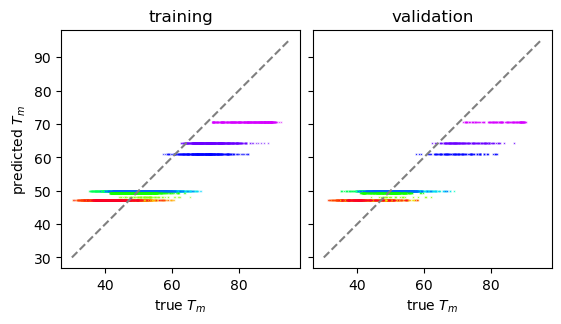

In [5]:
model = 'baseline_e'

fig, ax = plt.subplots(
    1,2, sharex=True, sharey=True, figsize=(5.5,3.1), layout='constrained'
)
ax = ax.flatten()
# fig.suptitle()

for i, set_name in enumerate(['training', 'validation']):

    alpha = 0.6 if set_name == 'training' else 0.8

    pred_file = f'{model_names[model]}-predicted_values-{set_name[:5]}_set-best.csv'
    print(i, pred_file)

    with open(pred_file, 'r') as f:
        header = f.readline().replace('# ', '').replace('\n', '')
        true = f.readline().replace('# true_labels,', '').replace('\n', '')

    species = []
    for accession in [a[:-5] for a in header.split(',')[1:]]:
        try:
            species.append(meta_species[meta_accessions==accession][0])
        except IndexError:
            print(accession)
            print(meta_accessions==accession)
    species = np.array(species)

    true = np.array(true.split(','), dtype=np.float_)
    pred = np.loadtxt(pred_file, dtype=np.float_, delimiter=',')[1:]

    for sp in np.unique(species):
        ax[i].scatter(
            true[species==sp], pred[species==sp], marker='x',
            s=0.1, alpha=alpha, zorder=3,
            # c=f'C{list(model_names).index(model)}'
            color=cm(species2idx[sp]/len(species2idx)),
        )

    # if i%2 != 0:
    #     sns.kdeplot(
    #         x=true, y=pred[1:],
    #         levels=10,
    #         fill=True, alpha=0.2, zorder=2,
    #         color=f'C{list(model_names).index(model)}',
    #         ax=ax[i],
    #     )

    ax[i].plot(
        np.linspace(30,95), np.linspace(30,95),
        '--', c='gray', alpha=1, zorder=4
    )

    ax[i].set_title(f'{set_name}')
    ax[i].set_xlabel(r'true $T_m$')
    if i%2 == 0:
        ax[i].set_ylabel(r'predicted $T_m$')
    # ax[i].grid()
    ax[i].set_aspect('equal')
    ax[i].tick_params(labelbottom=True)

    # ax[i].xaxis.tick_bottom()

    # ax[i].set_xlim(0, df['epoch'].max())
    # ax[i].set_ylim(metric_limits[metric])

if save:
    plt.savefig(
    f'true_vs_pred-{model}.png',
    dpi=300
)
plt.show()
plt.close()